In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



<h3>KNAPSACK Problem</h3>

In [2]:
# Problem definition
knapsack_len=300
# weights between 10 to 40
knapsack_weights=np.random.uniform(10,40,knapsack_len)
# values between 20 to 30
knapsack_values=np.random.uniform(20,30,knapsack_len)
max_weight_pct = 0.5
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

experiment_name = "Knapsack"
output_directory = "Knapsack"

<h3>MIMC</h3>

In [3]:
%%time
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name=experiment_name + "_MIMIC",
                               output_directory=output_directory,
                          seed=33,
                          iteration_list=[100],
                          max_attempts=100,
                       population_sizes=[200, 400, 600],
                       keep_percent_list=[0.05, 0.1, 0.20, 0.3],
#                           population_sizes=[20,50,100],
#                           keep_percent_list=[0.25, 0.5, 0.75],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Wall time: 14min 28s


In [4]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.007511,3622.999708,200.0,True,200,0.05,100
1,1,0.109163,3976.126313,402.0,True,200,0.05,100
2,2,0.208391,4021.854502,604.0,True,200,0.05,100
3,3,0.311771,4084.739148,806.0,True,200,0.05,100
4,4,0.424783,4115.316018,1008.0,True,200,0.05,100
...,...,...,...,...,...,...,...,...
1207,96,43.171388,4790.327115,58342.0,True,600,0.30,100
1208,97,43.635953,4790.327115,58943.0,True,600,0.30,100
1209,98,44.103142,4790.327115,59544.0,True,600,0.30,100
1210,99,44.567531,4790.327115,60145.0,True,600,0.30,100


In [5]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
4790.327115396508 4580.3007332916595 72.36377216666668
Keep Percent
0.05    4409.343675
0.10    4544.978692
0.20    4685.942095
0.30    4680.938471
Name: Fitness, dtype: float64
Population Size
200    4358.741729
400    4646.229872
600    4735.930599
Name: Fitness, dtype: float64
Population Size
200     41.115821
400     72.388499
600    103.586997
Name: Time, dtype: float64


In [6]:
best_index_in_mmc_curve = mmc_run_curves.Fitness.idxmax()
mmc_run_curves.iloc[best_index_in_mmc_curve]


Iteration                   72
Time                 31.799664
Fitness            4790.327115
FEvals                 43918.0
use_fast_mimic            True
Population Size            600
Keep Percent               0.3
max_iters                  100
Name: 1183, dtype: object

In [7]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.007511,3622.999708,200.0,True,200,0.05,100
1,1,0.109163,3976.126313,402.0,True,200,0.05,100
2,2,0.208391,4021.854502,604.0,True,200,0.05,100
3,3,0.311771,4084.739148,806.0,True,200,0.05,100
4,4,0.424783,4115.316018,1008.0,True,200,0.05,100
...,...,...,...,...,...,...,...,...
1207,96,43.171388,4790.327115,58342.0,True,600,0.30,100
1208,97,43.635953,4790.327115,58943.0,True,600,0.30,100
1209,98,44.103142,4790.327115,59544.0,True,600,0.30,100
1210,99,44.567531,4790.327115,60145.0,True,600,0.30,100


In [8]:
best_p_size = mmc_run_curves.iloc[best_index_in_mmc_curve]['Population Size'] 
best_keep = mmc_run_curves.iloc[best_index_in_mmc_curve]['Keep Percent']  
best_curve_mmc = mmc_run_curves.loc[mmc_run_curves['Population Size'] == best_p_size, :]
best_curve_mmc = best_curve_mmc.loc[best_curve_mmc['Keep Percent'] == best_keep, :]
best_curve_mmc.reset_index(inplace=True)
best_p_size, best_keep


(600, 0.3)

Text(0, 0.5, 'Value')

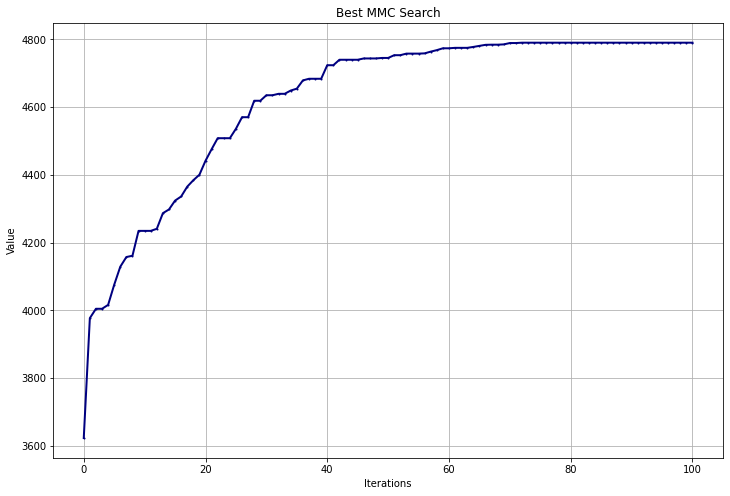

In [9]:
ax = best_curve_mmc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best MMC Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [10]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.007511,3622.999708,200.0,True,200,0.05,100
1,1,0.109163,3976.126313,402.0,True,200,0.05,100
2,2,0.208391,4021.854502,604.0,True,200,0.05,100
3,3,0.311771,4084.739148,806.0,True,200,0.05,100
4,4,0.424783,4115.316018,1008.0,True,200,0.05,100
...,...,...,...,...,...,...,...,...
1207,96,43.171388,4790.327115,58342.0,True,600,0.30,100
1208,97,43.635953,4790.327115,58943.0,True,600,0.30,100
1209,98,44.103142,4790.327115,59544.0,True,600,0.30,100
1210,99,44.567531,4790.327115,60145.0,True,600,0.30,100


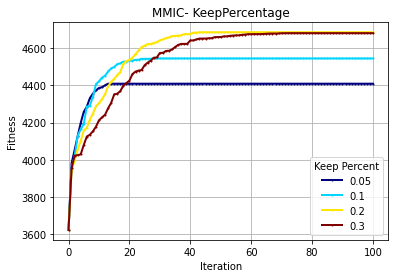

In [11]:
mmc_kp = mmc_run_curves.groupby(['Iteration','Keep Percent']).agg({'Fitness':'mean'}).reset_index()
ax = mmc_kp.pivot_table(values="Fitness", index="Iteration", columns="Keep Percent").plot(lw=2, colormap='jet', 
                                                                                          grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='MMIC- KeepPercentage')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/Knap/Knap_mmc_keep_percent.png')

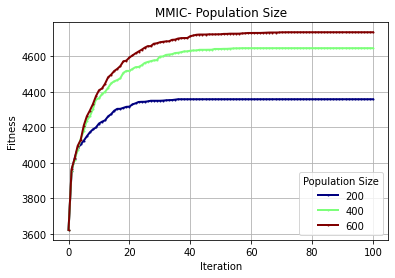

In [12]:
mmc_p = mmc_run_curves.groupby(['Iteration','Population Size']).agg({'Fitness':'mean'}).reset_index()
ax = mmc_p.pivot_table(values="Fitness", index="Iteration", columns="Population Size").plot(lw=2, colormap='jet', 
                                                                                          grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='MMIC- Population Size')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/Knap/Knap_mmc_p_size.png')

<h3> RHC </h3>

In [13]:
%%time
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

runner_return = mlrose_hiive.RHCRunner(problem,
                                       experiment_name=experiment_name+ "_RHC",
                                       output_directory=output_directory,
                                       iteration_list=[300],
                                       seed=33,
                                       restart_list=[10, 50, 100], max_attempts=100)
rhc_run_stats, rhc_run_curves = runner_return.run()

Wall time: 1min 12s


In [14]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000338,3622.999708,0.0,10,300,0
1,1,0.010586,3622.999708,1.0,10,300,0
2,2,0.010641,3650.924151,3.0,10,300,0
3,3,0.010672,3650.924151,4.0,10,300,0
4,4,0.010701,3650.924151,5.0,10,300,0
...,...,...,...,...,...,...,...
18089,96,0.015508,0.000000,11532.0,100,300,100
18090,97,0.015587,0.000000,11533.0,100,300,100
18091,98,0.015660,0.000000,11534.0,100,300,100
18092,99,0.015734,0.000000,11535.0,100,300,100


In [15]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve_rhc = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve_rhc.reset_index(inplace=True)
best_decay

75.0

In [16]:
best_index_in_RHC_curve = rhc_run_curves.Fitness.idxmax()
rhc_run_curves.iloc[best_index_in_RHC_curve]

Iteration            29.000000
Time                  0.011574
Fitness            3907.289046
FEvals             8499.000000
Restarts            100.000000
max_iters           300.000000
current_restart      75.000000
Name: 15181, dtype: float64

In [17]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Restarts").Fitness.mean())
print(last_iters.groupby("Restarts").Time.mean())
print(last_iters.groupby("Restarts").FEvals.mean())

Max and mean
3907.2890459146856 2291.3964203183 14.554185945398755
Restarts
10     2724.829474
50     2291.080137
100    2244.350548
Name: Fitness, dtype: float64
Restarts
10      0.322582
50      5.761724
100    20.543921
Name: Time, dtype: float64
Restarts
10      736.636364
50     3015.803922
100    5801.128713
Name: FEvals, dtype: float64


In [18]:
best_curve_rhc

,index,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,15153,1,0.010586,3576.815296,8458.0,100,300,75
1,15154,2,0.010641,3576.815296,8459.0,100,300,75
2,15155,3,0.010672,3600.729204,8461.0,100,300,75
3,15156,4,0.010701,3625.111229,8463.0,100,300,75
4,15157,5,0.010730,3625.111229,8464.0,100,300,75
...,...,...,...,...,...,...,...,...
124,15277,125,0.018387,3907.289046,8595.0,100,300,75
125,15278,126,0.018479,3907.289046,8596.0,100,300,75
126,15279,127,0.018568,3907.289046,8597.0,100,300,75
127,15280,128,0.018655,3907.289046,8598.0,100,300,75


Text(0, 0.5, 'Value')

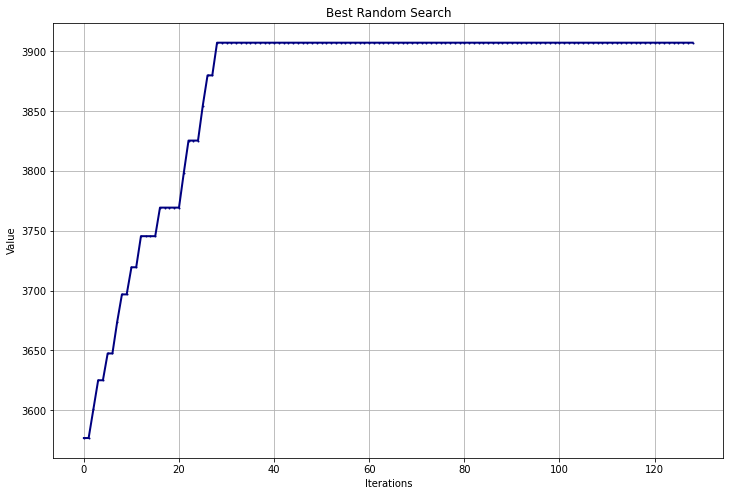

In [19]:
ax = best_curve_rhc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [20]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000338,3622.999708,0.0,10,300,0
1,1,0.010586,3622.999708,1.0,10,300,0
2,2,0.010641,3650.924151,3.0,10,300,0
3,3,0.010672,3650.924151,4.0,10,300,0
4,4,0.010701,3650.924151,5.0,10,300,0
...,...,...,...,...,...,...,...
18089,96,0.015508,0.000000,11532.0,100,300,100
18090,97,0.015587,0.000000,11533.0,100,300,100
18091,98,0.015660,0.000000,11534.0,100,300,100
18092,99,0.015734,0.000000,11535.0,100,300,100


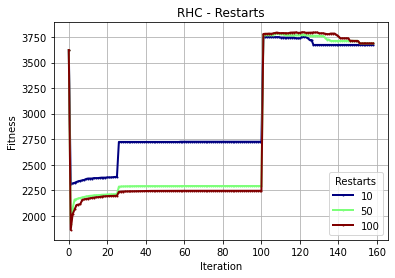

In [21]:
rhc_cr = rhc_run_curves.groupby(['Iteration','Restarts']).agg({'Fitness':'mean'}).reset_index()
ax = rhc_cr.pivot_table(values="Fitness", index="Iteration", columns="Restarts").plot(lw=2, colormap='jet', legend=True
                                                                                          , grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='RHC - Restarts')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/Knap/Knap_rhc_restart.png')

<h3>SA</h3>

In [22]:
%%time
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

sa = mlrose_hiive.SARunner(problem,
                            experiment_name=experiment_name+ "_SA",
                            output_directory=output_directory, 
                           iteration_list=[300],
                           temperature_list=[1, 5, 10, 50, 100],
                   decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay],
#                            temperature_list=[1, 10, 50, 100, 250],
#                            decay_list=[mlrose_hiive.ExpDecay,
#                                        mlrose_hiive.GeomDecay],
                           seed=33, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Wall time: 788 ms


In [23]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

3700.635362502726 3791.978989612403
0.035876253333344724


In [24]:
print(last_iters.loc[last_iters.schedule_init_temp == 0.05, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 0.1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 0.5, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 20, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 25, "Time"].mean())
print(last_iters.loc[:, "Time"].mean())

nan
nan
nan
0.014328166666700781
0.0345369333333565
nan
nan
0.035876253333344724


In [25]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve_sa = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve_sa.reset_index(inplace=True)
best_decay

ExpDecay(init_temp=100, exp_const=0.005, min_temp=0.001)

In [26]:
best_index_in_SA_curve = sa_run_curves.Fitness.idxmax()
sa_run_curves.iloc[best_index_in_SA_curve]

Iteration             291
Time              0.01141
Fitness        3867.11136
FEvals              466.0
Temperature           100
max_iters             300
Name: 2772, dtype: object

In [27]:
dfp = pd.DataFrame(sa_run_curves)
dfp = dfp.astype({'Temperature':'string'})

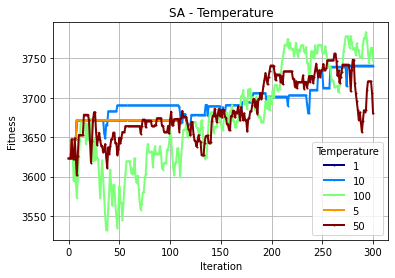

In [28]:
sa_ps = dfp.groupby(['Iteration','Temperature']).agg({'Fitness':'mean'}).reset_index()
ax = sa_ps.pivot_table(values="Fitness", index="Iteration", columns="Temperature").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='SA - Temperature')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/Knap/Knap_sa_temp.png')

Text(0, 0.5, 'Value')

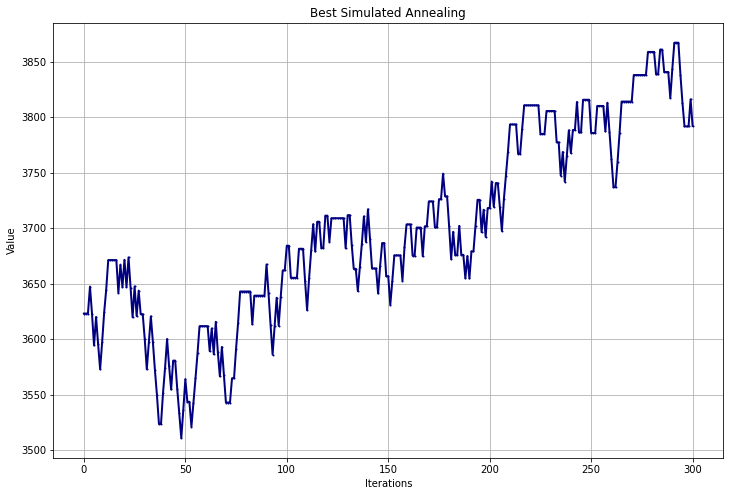

In [29]:
ax = best_curve_sa.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

<h3>GA</h3>

In [30]:
%%time
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

ga = mlrose_hiive.GARunner(problem=problem,
                        experiment_name=experiment_name+ "_GA",
                        output_directory=output_directory,
                          seed=44,
                          iteration_list=[100],
                          population_sizes=[200,400,600],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Wall time: 26.9 s


In [31]:

last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
4767.358137055287 4732.956480133015 2.9828857444444767
Mutation Rate
0.10    4737.381668
0.25    4728.518371
0.50    4732.969402
Name: Fitness, dtype: float64
Population Size
200    4710.611646
400    4746.378759
600    4741.879035
Name: Fitness, dtype: float64
Population Size
200    1.430720
400    2.990877
600    4.527060
Name: Time, dtype: float64


In [32]:
best_index_in_GA_curve = ga_run_curves.Fitness.idxmax()
ga_run_curves.iloc[best_index_in_GA_curve]


Iteration             98.000000
Time                   1.411551
Fitness             4767.358137
FEvals             39736.000000
Population Size      400.000000
Mutation Rate          0.100000
max_iters            100.000000
Name: 401, dtype: float64

In [33]:
best_p_size_ga = ga_run_curves.iloc[best_index_in_GA_curve]['Population Size'] 
best_m_rate = ga_run_curves.iloc[best_index_in_GA_curve]['Mutation Rate']  
best_curve_ga = ga_run_curves.loc[ga_run_curves['Population Size'] == best_p_size_ga, :]
best_curve_ga = best_curve_ga.loc[best_curve_ga['Mutation Rate'] == best_m_rate, :]
best_curve_ga.reset_index(inplace=True)
best_p_size_ga

400.0

Text(0, 0.5, 'Value')

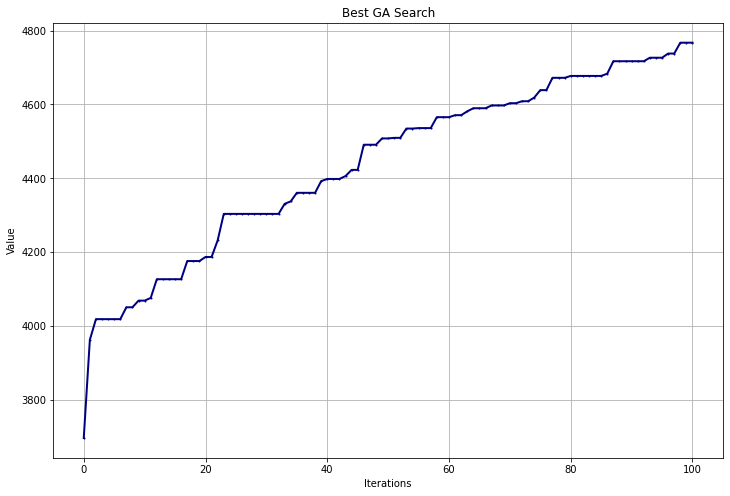

In [34]:
ax = best_curve_ga.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best GA Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [35]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.007252,3696.564718,200.0,200,0.1,100
1,1,0.030120,3902.218522,402.0,200,0.1,100
2,2,0.042576,3955.096822,604.0,200,0.1,100
3,3,0.055303,3955.096822,805.0,200,0.1,100
4,4,0.069138,3984.934128,1007.0,200,0.1,100
...,...,...,...,...,...,...,...
904,96,1.383675,4724.870710,58329.0,600,0.5,100
905,97,1.397733,4724.870710,58930.0,600,0.5,100
906,98,1.411551,4734.874980,59532.0,600,0.5,100
907,99,1.425789,4734.874980,60133.0,600,0.5,100


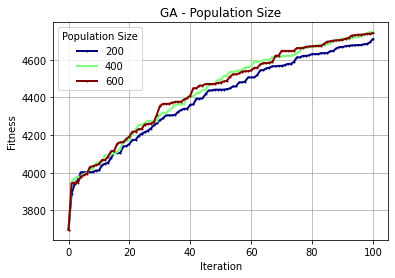

In [36]:
ga_ps = ga_run_curves.groupby(['Iteration','Population Size']).agg({'Fitness':'mean'}).reset_index()
ax = ga_ps.pivot_table(values="Fitness", index="Iteration", columns="Population Size").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='GA - Population Size')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/Knap/Knap_ga_p_size.png')

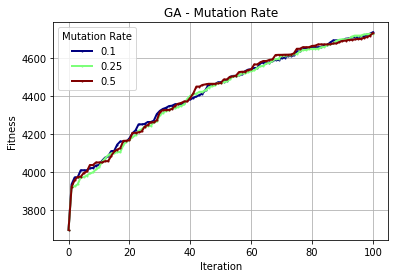

In [37]:
ga_mutaion = ga_run_curves.groupby(['Iteration','Mutation Rate']).agg({'Fitness':'mean'}).reset_index()
ax = ga_mutaion.pivot_table(values="Fitness", index="Iteration", columns="Mutation Rate").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='GA - Mutation Rate')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/Knap/Knap_ga_M_Rate.png')

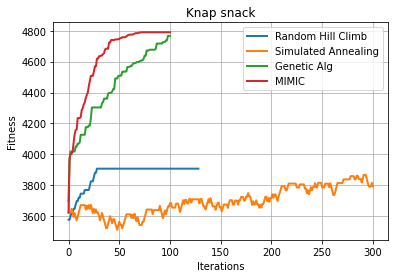

In [38]:
all_curves = {"Random Hill Climb": best_curve_rhc.Fitness, "Simulated Annealing": best_curve_sa.Fitness, "Genetic Alg": best_curve_ga.Fitness, "MIMIC": best_curve_mmc.Fitness}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("Knap snack")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.grid(visible=True)
plt.savefig('../images/Knap/knap_f_score_compare.png')
plt.show()

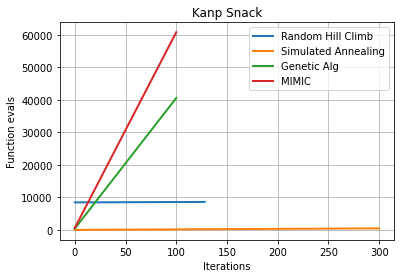

In [39]:
all_curves = {"Random Hill Climb": best_curve_rhc.FEvals, "Simulated Annealing": best_curve_sa.FEvals, "Genetic Alg": best_curve_ga.FEvals, "MIMIC": best_curve_mmc.FEvals}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Function evals")
plt.title("Kanp Snack")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.grid(visible=True)
plt.savefig('../images/Knap/knap_f_evals_compare.png')
plt.show()

In [40]:
best_curve_ga.FEvals

0        400.0
1        802.0
2       1204.0
3       1605.0
4       2006.0
        ...   
96     38933.0
97     39334.0
98     39736.0
99     40137.0
100    40538.0
Name: FEvals, Length: 101, dtype: float64

In [41]:
best_curve_mmc.FEvals

0        600.0
1       1202.0
2       1804.0
3       2405.0
4       3007.0
        ...   
96     58342.0
97     58943.0
98     59544.0
99     60145.0
100    60746.0
Name: FEvals, Length: 101, dtype: float64

In [42]:
def train_and_time(algo, times, fitness):
    start = time.clock()
    #print(algo())
    best_state, best_fitness,_ = algo()
    end = time.clock()
    times.append(end - start)
    fitness.append(best_fitness)

KnapSack Problem with  10  points
KnapSack Problem with  20  points
KnapSack Problem with  30  points
KnapSack Problem with  40  points
KnapSack Problem with  50  points
KnapSack Problem with  60  points
KnapSack Problem with  70  points


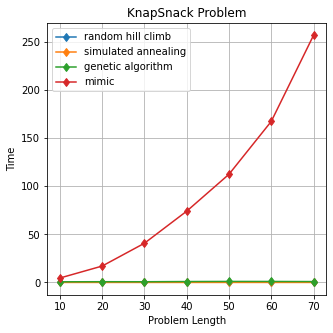

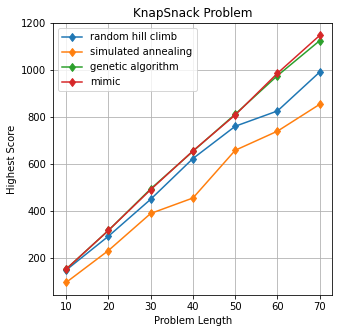

In [43]:
####### Kanp Snack
import time 

cp_hill_times = []
cp_hill_scores = []
cp_anneal_times = []
cp_anneal_scores = []
cp_genetic_times = []
cp_genetic_scores = []
cp_mimic_times = []
cp_mimic_scores = []


def run_knapSnack(num_points):
    
    knapsack_weights=np.random.uniform(10,40,num_points)
    knapsack_values=np.random.uniform(20,30,num_points)
    max_weight_pct = 0.5
    
    print ("KnapSack Problem with ", num_points, " points")
    
    knapSnack = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values, max_weight_pct=max_weight_pct)
    train_and_time(lambda : mlrose_hiive.random_hill_climb(problem=knapSnack, restarts =100, max_iters= 500, max_attempts= 100, random_state=33),cp_hill_times, cp_hill_scores)
    
    knapSnack = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values, max_weight_pct=max_weight_pct)
    train_and_time(lambda : mlrose_hiive.simulated_annealing(problem=knapSnack, schedule= mlrose_hiive.GeomDecay(init_temp=0.5),max_iters=500, max_attempts= 100, random_state=33), cp_anneal_times, cp_anneal_scores)
    
    knapSnack = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values, max_weight_pct=max_weight_pct)
    train_and_time(lambda : mlrose_hiive.genetic_alg(problem=knapSnack,pop_size = 100, mutation_prob=0.1, max_iters=200, max_attempts= 100, random_state=33), cp_genetic_times, cp_genetic_scores)
    
    knapSnack = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values, max_weight_pct=max_weight_pct)
    train_and_time(lambda : mlrose_hiive.mimic(problem=knapSnack, pop_size = 600, keep_pct= 0.3, max_iters=200, max_attempts= 100, random_state=33), cp_mimic_times, cp_mimic_scores)


point_range = range(10,80,10)
for p in point_range:
    run_knapSnack(p)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(point_range,cp_hill_times,'-d',point_range,cp_anneal_times,'-d',point_range,cp_genetic_times,'-d',point_range,cp_mimic_times,'-d')
plt.title("KnapSnack Problem")
plt.xlabel("Problem Length")
plt.ylabel("Time")
plt.legend(["random hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid(visible=True)
plt.savefig('../images/Knap/knap_time.png')
plt.show()

plt.plot(point_range,cp_hill_scores,'-d',point_range,cp_anneal_scores,'-d',point_range,cp_genetic_scores,'-d',point_range,cp_mimic_scores,'-d')
plt.title("KnapSnack Problem")
plt.xlabel("Problem Length")
plt.ylabel("Highest Score")
plt.legend(["random hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid(visible=True)
plt.savefig('../images/Knap/knap_h_score.png')
plt.show()